In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue',
 'OD280/OD315 of diluted wines', 'Proline']

print('Class labels', df_wine['Class label'].unique())
print(df_wine.head())
print(df_wine['Class label'].value_counts())

Class labels [1 2 3]
   Class label  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0            1    14.23        1.71  2.43               15.6        127   
1            1    13.20        1.78  2.14               11.2        100   
2            1    13.16        2.36  2.67               18.6        101   
3            1    14.37        1.95  2.50               16.8        113   
4            1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04           

In [3]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

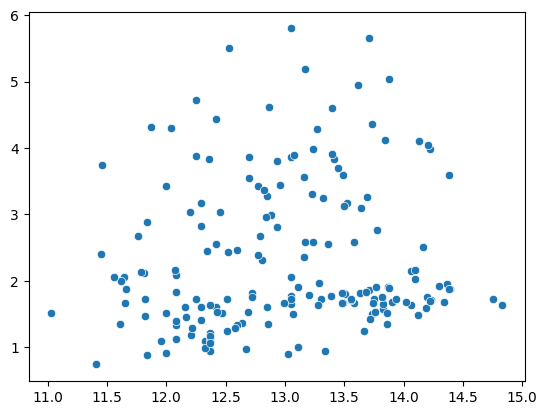

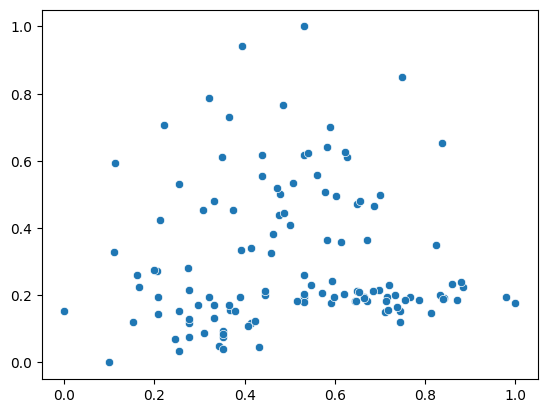

In [6]:
# One way to scale is to have all features lie in [0, 1]
# This is called normalizing
# Most useful when all features need to be in a bounded region
# Sensitive to outliers (might end up squishing most data in a tiny region causing underflow issues)
# Should typically test for outliers first
# divides X^(i)_j - min(X_j) by max(X_j) - min(X_j)
# Futher, outliers in the test that haven't been seen in the train set could cause issues for algorithms that require boundedness

from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()
sns.scatterplot(x=X_train_norm[:, 0], y=X_train_norm[:, 1])
plt.show()

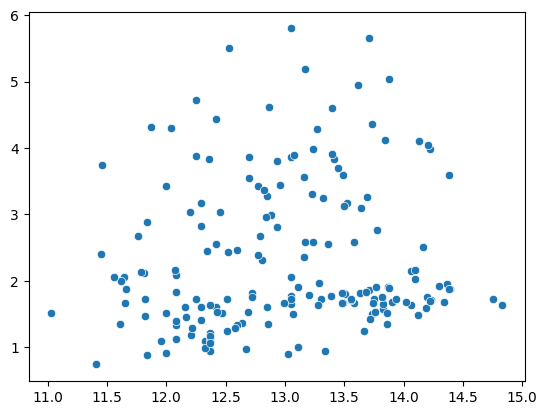

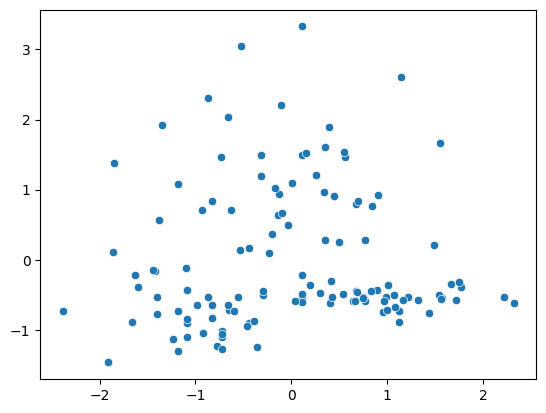

In [7]:
# The other way to rescale is to standardize by subtracting the mean and dividing by stdev by feature
# This is much more useful for many linear models such as logistic regression and SVM
# Does not actually impact the shape of the distribution (or even make it normally distributed)
# Maintains information about outliers

from sklearn.preprocessing import StandardScaler

ssc = StandardScaler()
X_train_std = ssc.fit_transform(X_train)
X_test_std = ssc.transform(X_test)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()
sns.scatterplot(x=X_train_std[:, 0], y=X_train_std[:, 1])
plt.show()

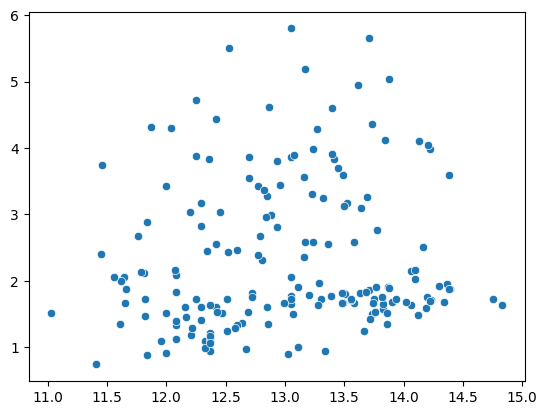

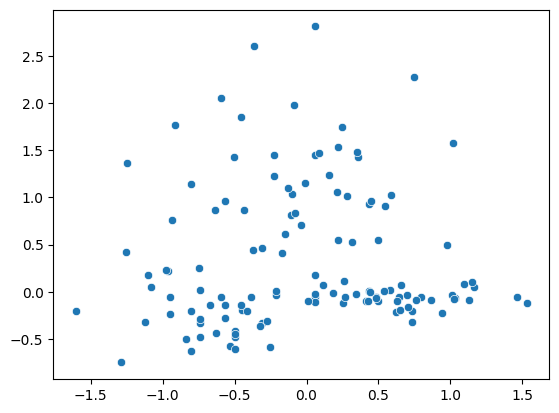

In [8]:
# At third way is the Robust scaler from sklearn
# Operates on each feautre column, removing the median value, and scales according to the 1st and 3rd quantile of the column
# Check out https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html#plot-all-scaling-robust-scaler-section for a pictorial rep of why this is better
# Essentially skirts the issue of outliers shifting the variance or mean by a ton

from sklearn.preprocessing import RobustScaler

rsc = RobustScaler()
X_train_rsc = rsc.fit_transform(X_train)
X_test_rsc = rsc.transform(X_test)

sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.show()
sns.scatterplot(x=X_train_rsc[:, 0], y=X_train_rsc[:, 1])
plt.show()